# Problem Statement
You are consulting for a real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City.  The real estate company has already concluded that two bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in.    

The real estate company has engaged your firm to build out a data product and provide your conclusions to help them understand which zip codes would generate the most profit on short term rentals within New York City.


# Assumptions
1. Occupancy rate of 75% throughout the year.
2. The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
3. The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
4. All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale).
5. All the reviews obtained are authentic and property having 10 as review score based on 1 review is same as property having 10 as review score based on 100 reviews.
6. All amenities mentioned within the properties are equally important and holds same weightage.
7. Only 1 day renting has been considered for calculations of yearly revenue.

# Steps followed

1. Zillow data was imported and various techniques were used to find the value of properties in June 2019 (since the Airbnb data was of June 2019). Relevant zipcodes for New York city were also extracted after the process.
2. Airbnb data was imported and initially data was cleaned to find the relevant columns adn values on the basis of zipcodes extracted from zillow data. Columns having wrong city name for zipcodes were also identified and correct value were imputed. Set of required columns was formed on the basis of metadata file provided.
3. Various exploratory data analysis techniques including data visual narratives were used to explore the data and to develop useful insights.
4. Finally breakeven period for the properties (found in extracted zipcodes) was calculated to get the top 5 zipcodes where real estate company should purchase properties to rent out short-term as part of their business model within New York City. 

# Recommendations
Top 5 zipcodes (with breakeven period) where real estate company should purchase properties are - 
1. **10306 zipcode** in Staten Island has breakeven period of **5.2 years**.
2. **10303 zipcode** in Staten Island has breakeven period of **7.4 years**.
3. **11434 zipcode** in Queens has breakeven period of **7.6 years**.
4. **10304 zipcode** in Staten Island has breakeven period of **7.8 years**.
5. **11234 zipcode** in Brooklyn has breakeven period of **9.1 years**.

## Conclusion
1. There is moderate correlation between price per night & population of a neighborhood (Sizerank) and between property cost & population of a neighborhood (Sizerank).
2. Staten Island properties have higher average review score than any other neighborhood properties.
3. Properties in any particular neighborhood has more or less same type of amenities. Properties in Queens tops the list in terms of Amenities score.
4. Manhattan has the highest median price per night as compared to any other neighborhood. Also, it has most the most expensive properties as well. 
5. Manhattan has more number of zipcodes and more properties followed by Brooklyn. Also, Airbnb data majorly consists of 1 bedroom apartment type properties.

## Future Steps
1. Sentiment Analysis on the description of the properties can also be done and weightage for same can be included in occupancy rate analysis.  
2. Reviews and amenities score provided on the Airbnb data for properties or zipcodes can be included in occupancy rate analysis (as shown in case study in the end)
3. Time series model can be implemented for better prediction of cost of the properties in any month.
4. Various other types of cost such as such as maintenance, repair, taxes should also be included in the final revenue estimation.
5. Inclusion of more property type except apartments to make the prediction less biased towards apartments.
5. Data of more properties should be gathered in Staten Island and Queens so that the distrubution is equal between the 4 neighborhood groups.
6. Data for 30, 60, 90 & 365 days availability and weekly & monthly price can also be gathered for calculation of more accurate rental price to make the study more robust.

In [1]:
#import various packages used during this study
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import zillow data under filename zillow
zillow = pd.read_csv("Cap one/Zip_Zhvi_2bedroom.csv")

In [3]:
#checking the top 5 rows of zillow data
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [4]:
#dimensions of zillow dataset
zillow.shape

(8946, 262)

In [5]:
#checking the data type of columns in zillow dataset
zillow.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2015-01         int64
2015-02         int64
2015-03         int64
2015-04         int64
2015-05         int64
2015-06         int64
2015-07         int64
2015-08         int64
2015-09         int64
2015-10         int64
2015-11         int64
2015-12         int64
2016-01         int64
2016-02       float64
2016-03   

In [6]:
#change column name of RegionName to zipcode 
zillow = zillow.rename(columns = {'RegionName':'zipcode'})

Funtion has been defined using three arguments (dataframe to be used, year in which price needs to be calculated, city for which cost is required). After that, 12 month rolling mean was calculated on the dataset to reduce any inconsistency present due to external factors related to political or economic situation in the city. Values after the June 2012 were retained to calculate last 5 years growth rate. After that year wise growth was calculated from June 2012 onwards and finally cost of property in June of required year is calculated using the average growth rate of last 5 years(from 2012 to 2017) using the below formula -

**Cost in June_2019 = (Cost in June_2017)*(1 + (Average_Growth_Rate)^2)**

Data has been then merged with master data and relevant columns which are required for the study has been retained.

In [7]:
def future_cost(arg, year, city):
    arg_cost = arg.iloc[:,7:].rolling(window = 12, axis=1).mean().loc[:, '2012-06':]
    arg_cost['growth_2016-2017'] = (arg_cost['2017-06']/arg_cost['2016-06']) - 1
    arg_cost['growth_2015-2016'] = (arg_cost['2016-06']/arg_cost['2015-06']) - 1
    arg_cost['growth_2014-2015'] = (arg_cost['2015-06']/arg_cost['2014-06']) - 1
    arg_cost['growth_2013-2014'] = (arg_cost['2014-06']/arg_cost['2013-06']) - 1
    arg_cost['growth_2012-2013'] = (arg_cost['2013-06']/arg_cost['2012-06']) - 1
    arg_cost['avg_growth'] = np.mean(arg_cost.iloc[:, -5:], axis = 1)
    arg_cost['future_cost'] = arg_cost['2017-06']*(1 + arg_cost['avg_growth'])**(year - 2017)
    arg_final = pd.concat([arg, arg_cost], axis=1, sort=False)
    arg_final = arg_final[['zipcode', 'City', 'SizeRank', 'future_cost']]
    arg_final = arg_final.sort_values(by = 'future_cost', ascending = False).reset_index()
    return arg_final[arg_final['City'] == city]

In [8]:
#Since the study is only related to New York and for year 2019, fitering out the New York city to remove irrelevant data
zillow_final = future_cost(zillow, 2019, 'New York')

In [9]:
#checking the number of unique values of zipcodes in New York City
zillow_final['zipcode'].nunique()

25

In [10]:
#correlation between SizeRank of zipcode and predicted cost in June 2019 
zillow_final['future_cost'].corr(-zillow_final['SizeRank'])

0.41294368094221723

Moderate correlation (value of .42) has been observed between SizeRank of zipcode and predicted cost in June 2019. Same has been shown through the graph between Property Cost in June 2019 and population size. (Smaller SizeRank means higher Population)

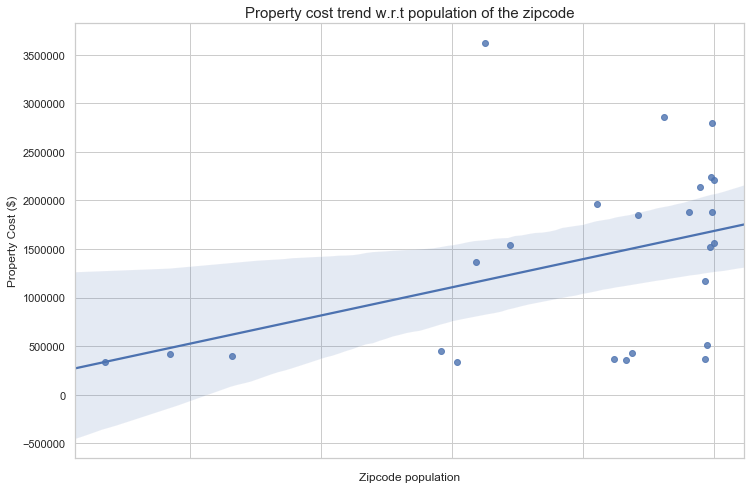

In [11]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.regplot(x = - zillow_final['SizeRank'], y = 'future_cost', data = zillow_final)
ax.set(xlabel="Zipcode population", ylabel='Property Cost ($)')
ax.set_title('Property cost trend w.r.t population of the zipcode', fontsize=15)
ax.set_xticklabels([])
plt.show()

In [12]:
#unique zipcodes obtained in New York city saved in zipcode_final file 
zipcode_final = zillow_final['zipcode'].values

In [13]:
#import zillow data under filename listings
listings = pd.read_csv('Cap one/listings.csv', low_memory=False)

In [14]:
#value for property availability in a year and its occupancy_rate. 
occupancy_rate = 0.75
availability = 365

In [15]:
#checking the dimensions of the airbnb listings
listings.shape

(48895, 106)

In [16]:
#column type for the data in listings dataset
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [17]:
#checking the top 5 rows of listings data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


Since the zipcodes is the most important column in the dataset (as all the merging, grouping and searching will be done on that basis) and should contain no NA/empty values, data is first checked for the same. 517 cells were found to be empty in zipcode column of listings dataset. Since these values constitutes a small portion of the dataset (no of total rows = 48895), we are removing these values. After removing that data, it was found that some rows contained zipcode of length greater than 5 digits so all those datapoints were sliced and first 5 digits has been taken and type of column has been changed to int.  

In [18]:
print("Total null values in zipcode column are %5s"%format(listings['zipcode'].isnull().sum()))
listings.dropna(subset = ['zipcode'], inplace = True)
print("Shape of dataframe after dropping null values rows is %5s"%format(listings.shape))
listings['zipcode'] = listings['zipcode'].astype(str).str[0:5]
#listings.drop(listings[listings['zipcode'].str.contains('\.')].index, inplace = True)
listings['zipcode'] = listings['zipcode'].astype(int)

Total null values in zipcode column are   517
Shape of dataframe after dropping null values rows is (48378, 106)


Zipcodes that are part of zillow_final (those belongs to New York city) have been retained.

In [19]:
listings = listings[listings['zipcode'].isin(zipcode_final)]
listings = listings.sort_values(by = 'zipcode').reset_index(drop = True)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4787386,https://www.airbnb.com/rooms/4787386,20190708031610,2019-07-08,Spacious East Village Apartment,Trendy East Village neighborhood situated with...,Trendy East Village neighborhood situated with...,Trendy East Village neighborhood situated with...,none,(website hidden),...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.77
1,23110266,https://www.airbnb.com/rooms/23110266,20190708031610,2019-07-08,SoHo LOFT #2 Broadway Av. - Amazing Location!,This is a spectacular 2 bedrooms LOFT; dimensi...,Maximum capacity: five passengers. Building wi...,This is a spectacular 2 bedrooms LOFT; dimensi...,none,"It is located in the SoHo area , the paradise ...",...,f,f,moderate,f,f,4,4,0,0,0.46
2,6797564,https://www.airbnb.com/rooms/6797564,20190708031610,2019-07-08,Summer in Gramercy Park. New York,Gramercy is the best neighborhood because it g...,NaN,Gramercy is the best neighborhood because it g...,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN
3,10805767,https://www.airbnb.com/rooms/10805767,20190708031610,2019-07-08,East Village 2bdr/1bath,2 bedroom / 1 bath 1 Queen Bed 1 Full Bed Brea...,NaN,2 bedroom / 1 bath 1 Queen Bed 1 Full Bed Brea...,none,The neighborhood is covered with fun restauran...,...,f,f,flexible,f,f,1,1,0,0,NaN
4,10788568,https://www.airbnb.com/rooms/10788568,20190708031610,2019-07-08,Houston St. 1 BDRM East Village/LES,A 5th FL modern apartment at the crossroads of...,NaN,A 5th FL modern apartment at the crossroads of...,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN


Relevant columns have been identified from the metadata file provided and only those columns will be used for further analysis

In [20]:
#updating listings dataset with relevant columns
required_cols = ['zipcode', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
listings = listings[required_cols]

In [21]:
#checking if one zipcode belongs to only 1 neighbourhood (neighbourhood_group_cleansed)
listings[['zipcode', 'neighbourhood_group_cleansed']].drop_duplicates(subset = ['zipcode', 'neighbourhood_group_cleansed']).groupby('zipcode').count().sort_values(by = 'neighbourhood_group_cleansed', ascending = False)

,neighbourhood_group_cleansed
zipcode,
10013,2
10128,2
10003,1
10306,1
11234,1
11231,1
11217,1
11215,1
11201,1


2 zipcodes have been identified from the data which contains name of two neighbourhoods (10013 and 10128). City name count have been calculated in that zipcode and data has been imputed with that neighbourhood which has maximum value.

In [22]:
listings[listings['zipcode'] == 10013]['neighbourhood_group_cleansed'].value_counts()

Manhattan    482
Brooklyn       3
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
listings.loc[listings['zipcode'] == 10013,'neighbourhood_group_cleansed'] = 'Manhattan'

In [24]:
listings[listings['zipcode'] == 10128]['neighbourhood_group_cleansed'].value_counts()

Manhattan    414
Brooklyn       1
Name: neighbourhood_group_cleansed, dtype: int64

In [25]:
listings.loc[listings['zipcode'] == 10128,'neighbourhood_group_cleansed'] = 'Manhattan'

In [26]:
#renaming the neighbourhood_group_cleansed to neighbourhood
listings = listings.rename(columns = {'neighbourhood_group_cleansed':'neighbourhood'})

In [27]:
#columns having higher than 50 percent missing value
for i in listings.columns.values:
    x = listings[i].isnull().sum()
    y = listings.shape[0]
    missing_precent = round(100*x/y, 3)
    if missing_precent > 50:
        print("Percentage of missing value in %s is %f percent"%(i, missing_precent))

Percentage of missing value in square_feet is 98.920000 percent
Percentage of missing value in weekly_price is 86.726000 percent
Percentage of missing value in monthly_price is 89.064000 percent


Percentage of missing value have been identified in each column of listings dataset and column with high missing value (>80 percent) is dropped from further analysis. 3 columns have been identified during the process.

In [28]:
listings.drop(columns = ['square_feet', 'weekly_price', 'monthly_price'], inplace = True)

In [29]:
#missing value in the columns of dataset
for i in ['availability_30', 'availability_60', 'availability_90', 'availability_365']:
    x = (listings[i] == 0).sum()
    y = listings.shape[0]
    missing_precent = 100*x/y
    print("Percentage of datapoints with %s value as 0, is %f percent"%(i, missing_precent))

Percentage of datapoints with availability_30 value as 0, is 54.413076 percent
Percentage of datapoints with availability_60 value as 0, is 45.586924 percent
Percentage of datapoints with availability_90 value as 0, is 43.318474 percent
Percentage of datapoints with availability_365 value as 0, is 39.276870 percent


Since large portion of values in each column has 0 value as availability, therefore we can consider these as missing values and hence can drop the columns. 

In [30]:
listings.drop(columns = ['availability_30', 'availability_60', 'availability_90', 'availability_365'], inplace = True)

In [31]:
#checking the datatype of remaining columns 
listings.dtypes

zipcode                          int32
neighbourhood                   object
property_type                   object
room_type                       object
bathrooms                      float64
bedrooms                       float64
amenities                       object
price                           object
cleaning_fee                    object
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

Data has been divided into 3 dataset (Cost part, Review part and Amenities part) to study various trends in the property database across neighborhood and zipcode.

In [32]:
cost_cols = ['zipcode', 'neighbourhood', 'property_type', 'room_type', 'bedrooms', 'price', 'cleaning_fee']
review_cols = ['zipcode', 'neighbourhood', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
amenities_cols = ['zipcode', 'neighbourhood', 'amenities']

In [33]:
#dataset related to reviews on the property created under listings_review dataset
listings_review = listings[review_cols]
listings_review.head()

,zipcode,neighbourhood,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10003,Manhattan,10.0,9.0,9.0,10.0,10.0,10.0
1,10003,Manhattan,8.0,7.0,8.0,8.0,9.0,7.0
2,10003,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN
3,10003,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN
4,10003,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#checking datatype of listings_review dataset
listings_review.dtypes

zipcode                          int32
neighbourhood                   object
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

NA/empty values has been dropped from the dataset and a final review score has been calculated using the below 6 columns - 
1. review_scores_accuracy
2. review_scores_cleanliness
3. review_scores_checkin
4. review_scores_communication
5. review_scores_location
6. review_scores_value 

Median review score has been calculated and normalized on 0 to 1 scale for each zipcode and data has been arranged in ascending order of scores.

It has been assumed that all columns has equal weightage, all the reviews obtained are authentic and property having 10 as review score based on 1 review is same as property having 10 as review score based on 100 reviews.

In [35]:
listings_review.dropna(inplace = True)
listings_review.loc[:, 'review_score'] = np.mean(listings_review.iloc[:, 2:], axis = 1)/10
listings_review = listings_review[['zipcode', 'review_score', 'neighbourhood']]
listings_review = listings_review.groupby(['zipcode', 'neighbourhood']).sum()/listings_review.groupby(['zipcode', 'neighbourhood']).count()
listings_review = listings_review.sort_values(by = 'review_score', ascending = False)
listings_review.reset_index(inplace = True)
listings_review

,zipcode,neighbourhood,review_score
0,10309,Staten Island,1.000000
1,10306,Staten Island,0.981818
2,10305,Staten Island,0.978395
3,10308,Staten Island,0.978205
4,11201,Brooklyn,0.973307
5,11215,Brooklyn,0.973185
6,11217,Brooklyn,0.970175
7,11231,Brooklyn,0.969040
8,10314,Staten Island,0.967593
9,10023,Manhattan,0.965628


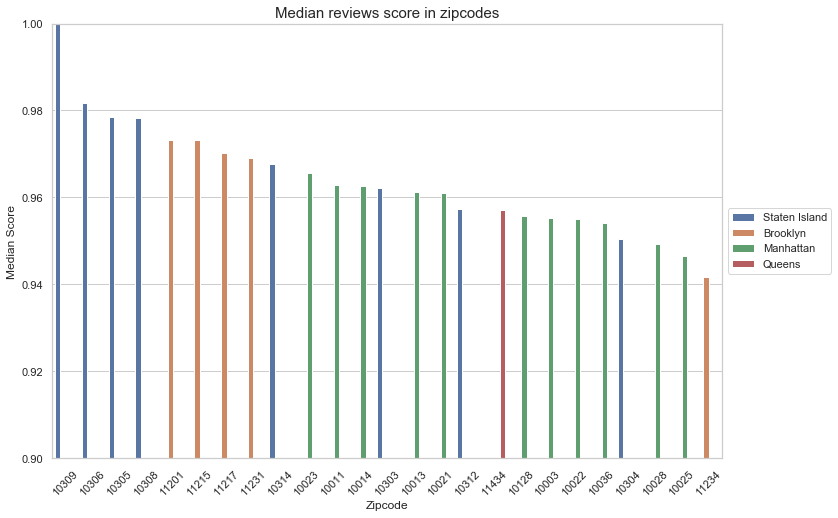

In [36]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'review_score', order = listings_review['zipcode'], hue = 'neighbourhood', data = listings_review)
ax.set(xlabel="Zipcode", ylabel='Median Score')
ax.set_title('Median reviews score in zipcodes', fontsize = 15)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = listings_review['zipcode'], rotation = 45)
ax.set_ylim(0.9, 1)
plt.show()

Barplot has been plotted using the review score, zipcode and the city. It has been observed that although all neighborhood properties has high mean review score (>.94), the properties under various zipcodes in Staten Island are performing better than all other neighborhood properties followed by properties in Brooklyn. 

In [37]:
#dataset related to amenities mentioned in the property created under listings_amenities dataset
listings_amenities = listings[amenities_cols]

In [38]:
#checking the top 5 rows of dataset
listings_amenities.head()

,zipcode,neighbourhood,amenities
0,10003,Manhattan,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
1,10003,Manhattan,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen..."
2,10003,Manhattan,"{""Air conditioning"",Kitchen,Elevator,Heating}"
3,10003,Manhattan,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen..."
4,10003,Manhattan,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."


Initially dummy encoding (0/1) was done on the amenities column using ',' as split. Then all amenities has been added for the property (for that row) to calculate amenities score and normalization has been done using the max value in the final column. Mean score has been calculated for each zipcode and data is arranged in increasing order based on final score.

In [39]:
listings_amenities = pd.concat([listings_amenities,listings_amenities.amenities.str.get_dummies(sep=',')],1)
listings_amenities['amenities_score'] = (listings_amenities.sum(axis = 1, numeric_only = True))/(listings_amenities.sum(axis = 1, numeric_only = True)).max()
listings_amenities = listings_amenities[['zipcode', 'neighbourhood', 'amenities_score']]
listings_amenities = listings_amenities.groupby(['zipcode', 'neighbourhood']).sum()/listings_amenities.groupby(['zipcode', 'neighbourhood']).count()
listings_amenities = listings_amenities.sort_values(by = 'amenities_score', ascending = False)
listings_amenities.reset_index(inplace = True)
listings_amenities

,zipcode,neighbourhood,amenities_score
0,11434,Queens,0.997326
1,11234,Brooklyn,0.979641
2,11231,Brooklyn,0.979206
3,11217,Brooklyn,0.977946
4,11215,Brooklyn,0.977891
5,11201,Brooklyn,0.976491
6,10314,Staten Island,0.899995
7,10312,Staten Island,0.899471
8,10308,Staten Island,0.899359
9,10309,Staten Island,0.899356


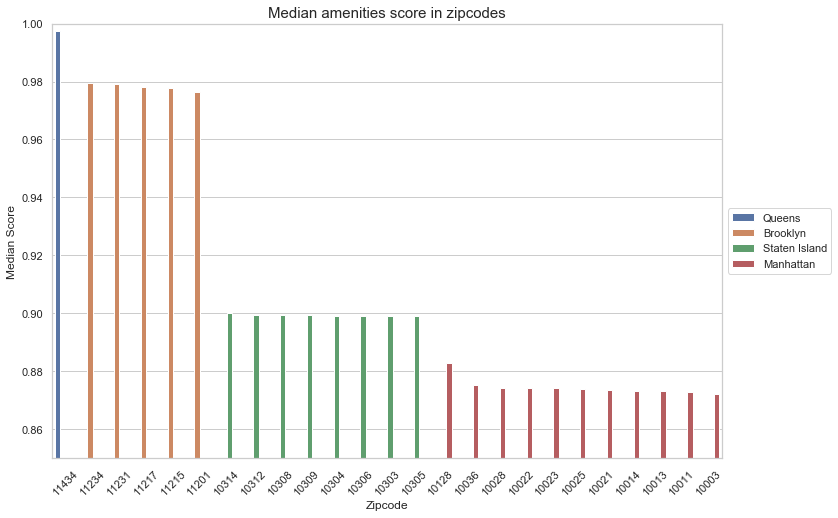

In [40]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'amenities_score', order = listings_amenities['zipcode'], hue = 'neighbourhood', data = listings_amenities)
ax.set(xlabel="Zipcode", ylabel='Median Score')
ax.set_title('Median amenities score in zipcodes', fontsize = 15)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = listings_amenities['zipcode'], rotation = 45)
ax.set_ylim(0.85, 1)
plt.show()

Barplot has been plotted from the obtained dataset. It can be observed that Queens tops the chart with highest score followed by Brooklyn, Staten Island and Manhattan. One interesting thing that can be seen is that within each neighborhood, there is not much difference between scores of each zipcode and score is hovering around the same value. 

In [41]:
#dataset related to cost and type of property with bedrooms information created under listings_cost dataset
listings_cost = listings[cost_cols]

In [42]:
#checking the top 5 rows of dataset
listings_cost.head()

,zipcode,neighbourhood,property_type,room_type,bedrooms,price,cleaning_fee
0,10003,Manhattan,Apartment,Private room,1.0,$175.00,$80.00
1,10003,Manhattan,Loft,Entire home/apt,2.0,$495.00,$135.00
2,10003,Manhattan,Apartment,Entire home/apt,1.0,$120.00,NaN
3,10003,Manhattan,Apartment,Entire home/apt,2.0,$325.00,NaN
4,10003,Manhattan,Apartment,Entire home/apt,1.0,$149.00,$50.00


In [43]:
#checking the datatype of columns of listings_cost dataset
listings_cost.dtypes

zipcode            int32
neighbourhood     object
property_type     object
room_type         object
bedrooms         float64
price             object
cleaning_fee      object
dtype: object

After observing the data for price and cleaning_fee columns, it was found that cell value contain the $ sign and ','. $ sign has been removed using slicing the value after 1st digit and ',' has been removed. Both cells has been converted into float type.

In [44]:
listings_cost.loc[:,'price'] = listings_cost.loc[:,'price'].str[1:]
listings_cost.loc[:,'price'] = listings_cost.loc[:,'price'].str.replace(',', '')
listings_cost.loc[:,'price'] = listings_cost.loc[:,'price'].astype(float)
listings_cost.loc[:,'cleaning_fee'] = listings_cost.loc[:,'cleaning_fee'].str[1:]
listings_cost.loc[:,'cleaning_fee'] = listings_cost.loc[:,'cleaning_fee'].str.replace(',', '')
listings_cost.loc[:,'cleaning_fee'] = listings_cost.loc[:,'cleaning_fee'].astype(float)

In [45]:
#Verifying that price columns does not have any value equal to 0.0
(listings_cost['price'] == 0.0).sum()

0

In [46]:
#describing the columns in the listings_cost data after the city filter with various statistics
listings_cost[['price', 'cleaning_fee']].describe()

,price,cleaning_fee
count,10095.000000,8046.000000
mean,207.139376,83.090604
std,289.171426,62.922199
min,10.000000,0.000000
25%,100.000000,40.000000
50%,150.000000,75.000000
75%,225.000000,100.000000
max,10000.000000,1000.000000


From the above data, it can be observed that price and cleaning_fee columns contain some outlying value. Distribution plot and boxplot has been drawn to verify the same and to observe trends in both columns.

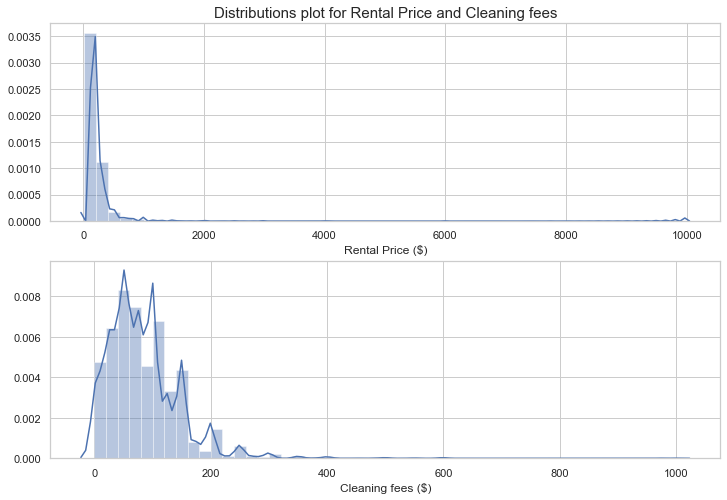

In [47]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
sns.set(style="whitegrid")
sns.distplot(listings_cost['price'],ax=axes[0])
sns.distplot(listings_cost['cleaning_fee'][listings_cost['cleaning_fee'].notnull()], ax=axes[1])
axes[0].set_title('Distributions plot for Rental Price and Cleaning fees', fontsize = 15)
axes[0].set(xlabel="Rental Price ($)")
axes[1].set(xlabel="Cleaning fees ($)")
plt.show()

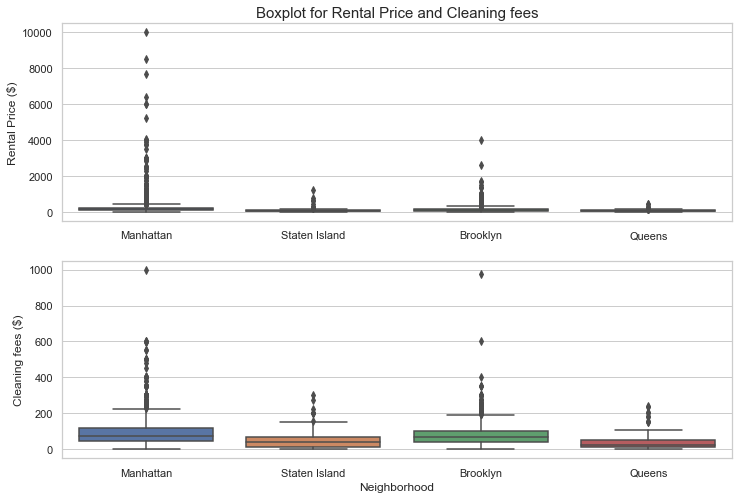

In [48]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
sns.set(style="whitegrid")
sns.boxplot(x = 'neighbourhood', y = 'price', data=listings_cost, ax=axes[0])
sns.boxplot(x = 'neighbourhood', y = 'cleaning_fee', data=listings_cost[listings_cost['cleaning_fee'].notnull()], ax=axes[1])
axes[0].set_title('Boxplot for Rental Price and Cleaning fees', fontsize = 15)
axes[0].set(xlabel = "", ylabel="Rental Price ($)")
axes[1].set(xlabel = 'Neighborhood', ylabel="Cleaning fees ($)")
plt.show()

- After observing the above plots and data of both columns, most of the data has been found below 2000 dollars for price column. Hence, cells which have price above 2000 dollars has been removed from the dataset.
- For cleaning fee, first the NA values were imputed with the median data for that zipcode and then maximum value of 300 dollars has been taken (below which most of the data lies)  

In [49]:
listings_cost = listings_cost[listings_cost['price'] < 1500]
listings_cost.loc[:,'cleaning_fee'] = listings_cost.groupby('zipcode')['cleaning_fee'].transform(lambda x: x.fillna(x.median()))
listings_cost = listings_cost[listings_cost['cleaning_fee'] < 300]

Below plots show the price and fees distribution after changes.

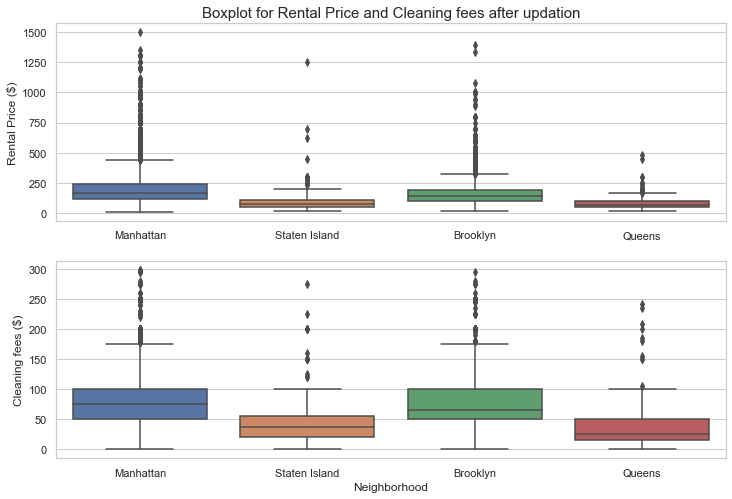

In [50]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
sns.set(style="whitegrid")
sns.boxplot(x = 'neighbourhood', y = 'price', data=listings_cost, ax=axes[0])
sns.boxplot(x = 'neighbourhood', y = 'cleaning_fee', data=listings_cost[listings_cost['cleaning_fee'].notnull()], ax=axes[1])
axes[0].set_title('Boxplot for Rental Price and Cleaning fees after updation', fontsize = 15)
axes[0].set(xlabel = "", ylabel="Rental Price ($)")
axes[1].set(xlabel = 'Neighborhood', ylabel="Cleaning fees ($)")
plt.show()

In [51]:
#describing the columns in the listings_cost data after updation
listings_cost[['price', 'cleaning_fee']].describe()

,price,cleaning_fee
count,9968.000000,9968.000000
mean,188.713985,78.080357
std,142.242553,48.541833
min,10.000000,0.000000
25%,100.000000,50.000000
50%,150.000000,75.000000
75%,225.000000,100.000000
max,1495.000000,299.000000


In [52]:
#checking the top 5 rows after changes
listings_cost.head()

,zipcode,neighbourhood,property_type,room_type,bedrooms,price,cleaning_fee
0,10003,Manhattan,Apartment,Private room,1.0,175.0,80.0
1,10003,Manhattan,Loft,Entire home/apt,2.0,495.0,135.0
2,10003,Manhattan,Apartment,Entire home/apt,1.0,120.0,75.0
3,10003,Manhattan,Apartment,Entire home/apt,2.0,325.0,75.0
4,10003,Manhattan,Apartment,Entire home/apt,1.0,149.0,50.0


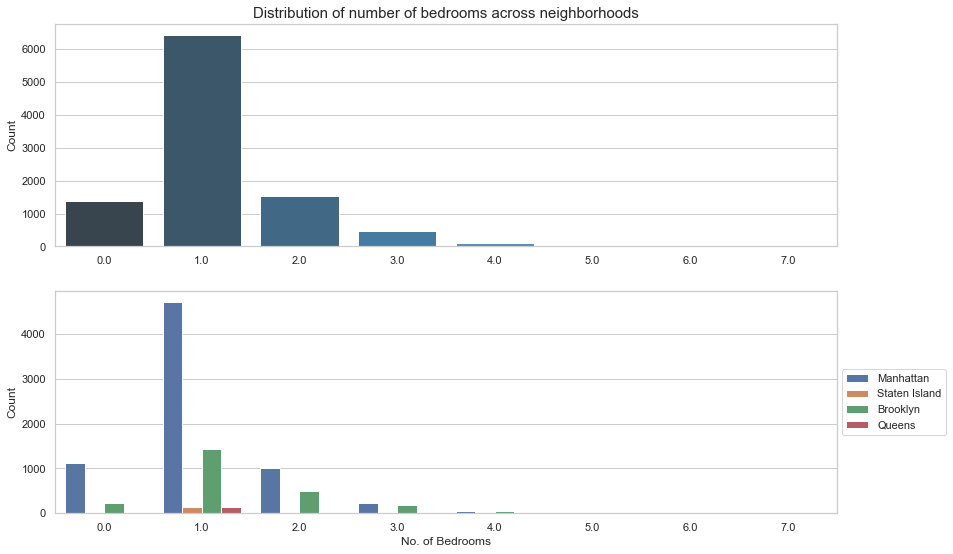

In [53]:
fig, axes = plt.subplots(2,1, figsize=(14,9))
sns.countplot(x='bedrooms', data=listings_cost, palette="Blues_d", ax = axes[0])
sns.countplot(x='bedrooms', hue = 'neighbourhood', data=listings_cost, ax = axes[1])
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
axes[0].set_title('Distribution of number of bedrooms across neighborhoods', fontsize = 15)
axes[0].set(xlabel = "", ylabel = "Count")
axes[1].set(xlabel = 'No. of Bedrooms', ylabel = "Count")
plt.show()

- First plot shows the overall distribution of bedrooms in properties across all zipcodes. It can be observed that this dataset largerly consist of 1 bedroom data followed by 2 bedroom.
- Second plot shows the distribution of bedrooms type in properties across various neighborhood. It can be observed that Manhattan dominates across all categories.

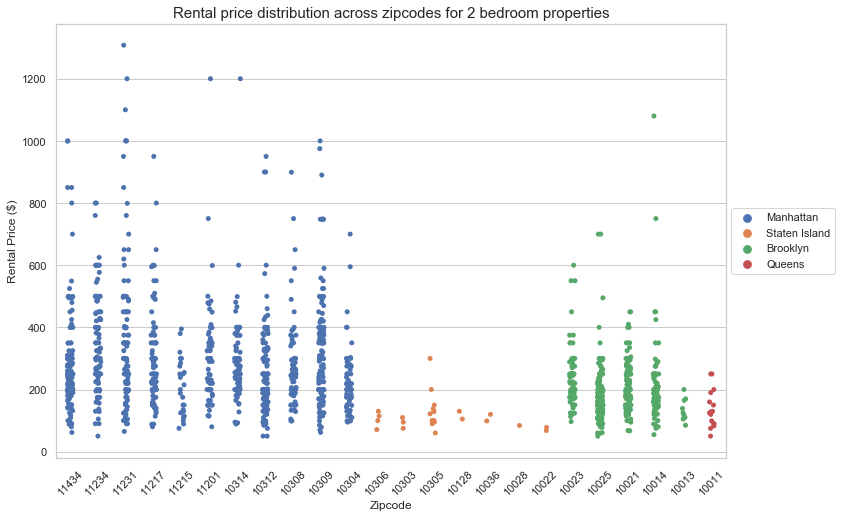

In [54]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.stripplot(x = 'zipcode', y = 'price', jitter = True, hue = 'neighbourhood', data=listings_cost[listings_cost['bedrooms'] == 2])
ax.set(xlabel="Zipcode", ylabel='Rental Price ($)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = listings_amenities['zipcode'], rotation = 45)
ax.set_title('Rental price distribution across zipcodes for 2 bedroom properties', fontsize = 15)
plt.show()

- Above plot shows the distribution of rental price of 2 bedroom properties across various zipcodes. It can be observed that this  dataset largerly comprise of properties belonging to Manhattan neighborhood followed by Brooklyn.

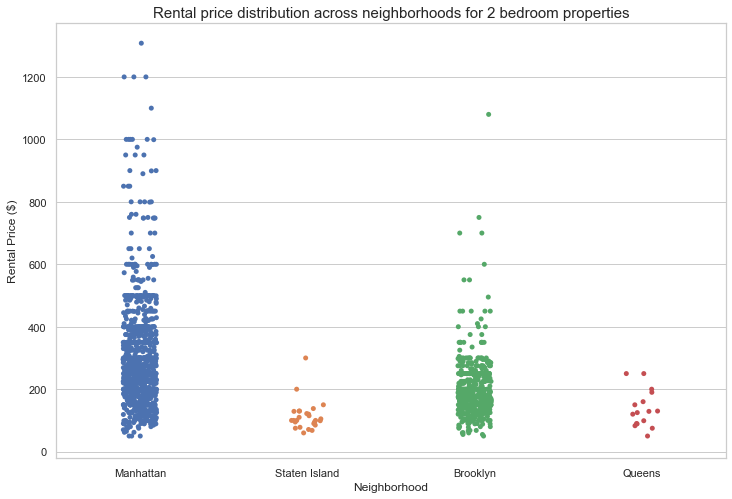

In [55]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.stripplot(x = 'neighbourhood', y = 'price', jitter = True, data=listings_cost[listings_cost['bedrooms'] == 2])
ax.set(xlabel="Neighborhood", ylabel='Rental Price ($)')
ax.set_title('Rental price distribution across neighborhoods for 2 bedroom properties', fontsize = 15)
plt.show()

- Above plot shows the distribution of rental price of 2 bedroom properties across various neighborhoods. It can be observed that there is large variation in rental price in Manhattan neighborhood and Staten Island & Queens have relatively lower price.

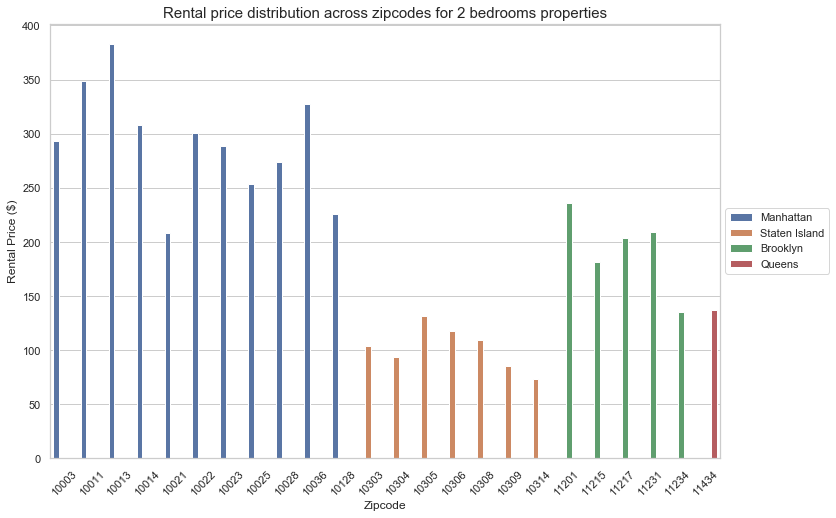

In [56]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'price', hue = 'neighbourhood', data=listings_cost[listings_cost['bedrooms'] == 2], ci=None)
ax.set(xlabel="Zipcode", ylabel='Rental Price ($)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_title('Rental price distribution across zipcodes for 2 bedrooms properties', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

- Above plot shows the rental price variation for 2 bedroom properties. Every zipcode in Manhattan have higher price than any other zipcode in any neighborhood.

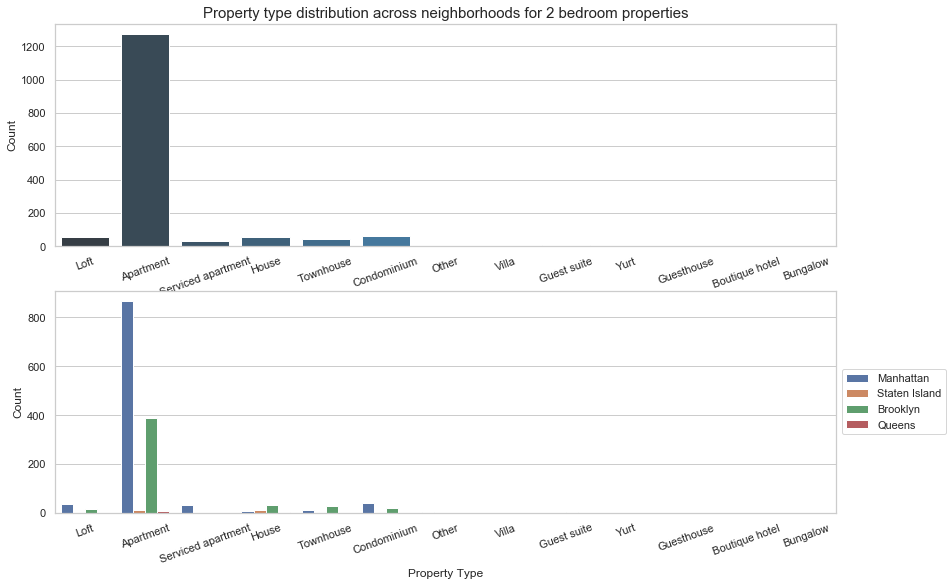

In [57]:
fig, axes = plt.subplots(2,1, figsize=(14,9))
sns.countplot(x='property_type', palette="Blues_d",data=listings_cost[listings_cost['bedrooms'] == 2], ax = axes[0])
sns.countplot(x='property_type', hue = 'neighbourhood', data=listings_cost[listings_cost['bedrooms'] == 2], ax = axes[1])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
axes[0].set_xticklabels(labels=listings_cost[listings_cost['bedrooms'] == 2]['property_type'].unique(), rotation=20)
axes[1].set_xticklabels(labels=listings_cost[listings_cost['bedrooms'] == 2]['property_type'].unique(), rotation=20)
axes[0].set_title('Property type distribution across neighborhoods for 2 bedroom properties', fontsize = 15)
axes[0].set(xlabel = '', ylabel = "Count")
axes[1].set(xlabel = 'Property Type', ylabel = "Count")
plt.show()

- First plot shows the overall distribution of property type across all zipcodes. It can be observed that this dataset largerly consist of apartment type data and apartment is more preferred than any other type.
- Second plot shows the distribution of property type across various neighborhood. It can be observed that in Manhattan dominates in number of apartment.

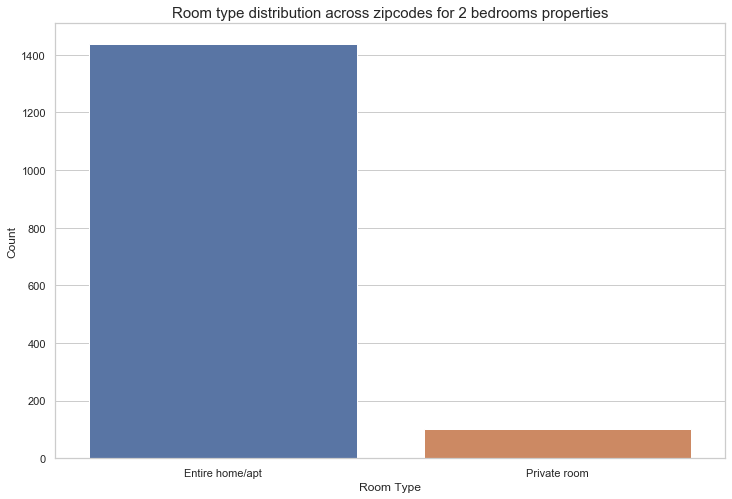

In [58]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.countplot(x='room_type', data=listings_cost[listings_cost['bedrooms'] == 2])
ax.set(xlabel="Room Type", ylabel='Count')
ax.set_title('Room type distribution across zipcodes for 2 bedrooms properties', fontsize = 15)
plt.show()

- Above plot shows the distribution of room type for 2 bedroom properties. It can be observed that entire home/apt is more preferred for rent than Private room.

In [59]:
#count of 2 bedrooms properties across various neighborhoods
property_count = listings_cost[listings_cost['bedrooms'] == 2].groupby(['zipcode', 'neighbourhood']).agg({'property_type':'count'}).sort_values(by = 'property_type', ascending = False).reset_index()
property_count = property_count.rename(columns = {'property_type':'property_count'})
property_count

,zipcode,neighbourhood,property_count
0,11215,Brooklyn,189
1,10036,Manhattan,144
2,10003,Manhattan,135
3,11217,Brooklyn,123
4,10025,Manhattan,119
5,10011,Manhattan,104
6,10013,Manhattan,102
7,11231,Brooklyn,92
8,10014,Manhattan,86
9,11201,Brooklyn,83


It can be observed that this dataset mostly contains the data for Brooklyn and Manhattan area. This can also make this study biased for these 2 areas. Distribution for the same across zipcodes and neighborhoods can be observed in below plots.  

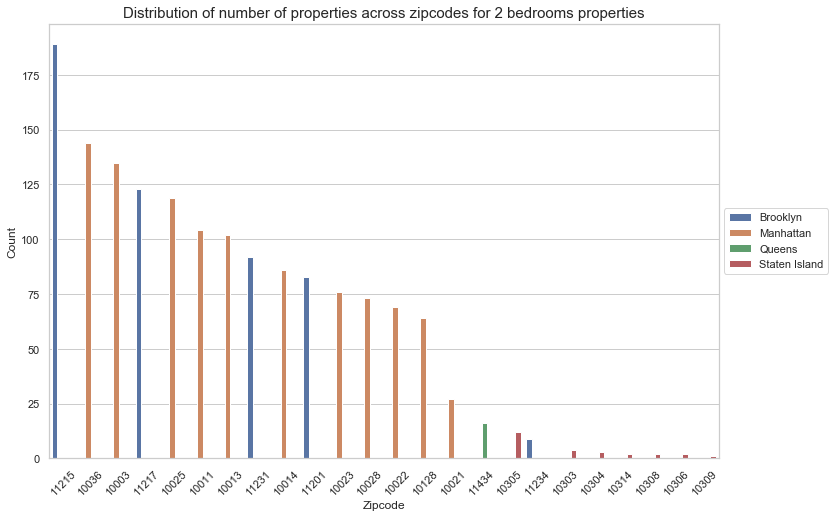

In [60]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'property_count', order = property_count['zipcode'], hue = 'neighbourhood', data = property_count)
ax.set(xlabel="Zipcode", ylabel='Count')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = property_count['zipcode'], rotation = 45)
ax.set_title('Distribution of number of properties across zipcodes for 2 bedrooms properties', fontsize = 15)
plt.show()

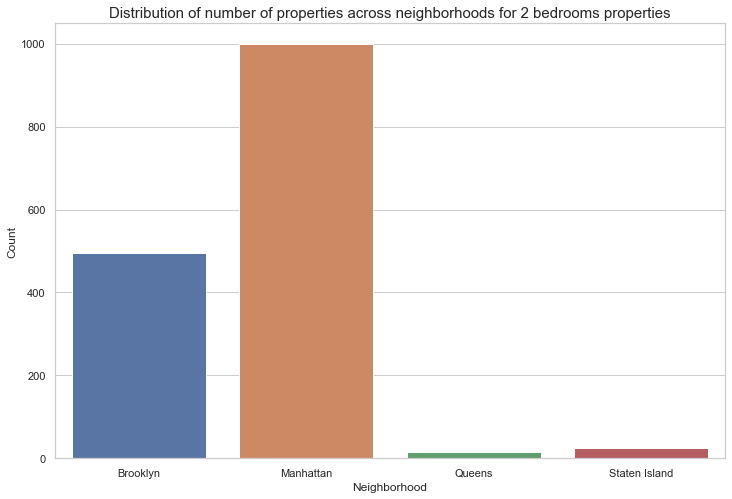

In [61]:
property_count_group_sum = property_count.groupby('neighbourhood').agg({'property_count':'sum'}).reset_index()
property_count_group_sum
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'neighbourhood', y = 'property_count', data = property_count_group_sum, ci = None)
ax.set(xlabel="Neighborhood", ylabel='Count')
ax.set_title('Distribution of number of properties across neighborhoods for 2 bedrooms properties', fontsize = 15)
plt.show()

After observing various charts showing distribution of properties on different parameters across zipcodes and neighborhoods, we will figure out the breakeven time for properties in various zipcode. We are now taking the groupwise median rental price and median cleaning fee for each zipcode  for further calculations. The same has been done through below code.

In [62]:
#taking groupwise median rental price and cleaning_fee for each zipcode
listings_cost = listings_cost.groupby(['bedrooms', 'zipcode', 'neighbourhood', 'property_type', 'room_type']).agg({'price':'median', 'cleaning_fee':'median'})
listing_cost_final = zillow_final.merge(listings_cost.reset_index(), on = 'zipcode')
listing_cost_final.head()

,index,zipcode,City,SizeRank,future_cost,bedrooms,neighbourhood,property_type,room_type,price,cleaning_fee
0,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Entire home/apt,150.0,79.5
1,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Private room,85.0,79.5
2,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Loft,Entire home/apt,320.0,130.0
3,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Serviced apartment,Entire home/apt,135.0,79.5
4,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Entire home/apt,175.0,79.5


Total price for one night stay has been calculated using the rental price for one night and cleaning fee for one night. Here we are considering that only one night stay will be done. Using the total price, we are calculatiing the yearly revenue for that property using occupancy rate of 0.75 across the year and after breakeven period has been calculated using the yearly revenue.

In [63]:
listing_cost_final['total_price'] = listing_cost_final['price'] + listing_cost_final['cleaning_fee']
listing_cost_final['revenue_yearly'] = listing_cost_final['total_price'] * occupancy_rate * availability
listing_cost_final['breakeventime'] = listing_cost_final['future_cost']/listing_cost_final['revenue_yearly']
listing_cost_final

,index,zipcode,City,SizeRank,future_cost,bedrooms,neighbourhood,property_type,room_type,price,cleaning_fee,total_price,revenue_yearly,breakeventime
0,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Entire home/apt,150.0,79.50,229.50,62825.6250,57.601923
1,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Private room,85.0,79.50,164.50,45031.8750,80.362561
2,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Loft,Entire home/apt,320.0,130.00,450.00,123187.5000,29.376981
3,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Serviced apartment,Entire home/apt,135.0,79.50,214.50,58719.3750,61.630029
4,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Entire home/apt,175.0,79.50,254.50,69669.3750,51.943581
5,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Private room,100.0,50.00,150.00,41062.5000,88.130942
6,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Shared room,100.0,50.00,150.00,41062.5000,88.130942
7,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Bed and breakfast,Private room,106.0,79.50,185.50,50780.6250,71.264912
8,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Boutique hotel,Private room,100.0,0.00,100.00,27375.0000,132.196413
9,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Condominium,Entire home/apt,259.0,100.00,359.00,98276.2500,36.823513


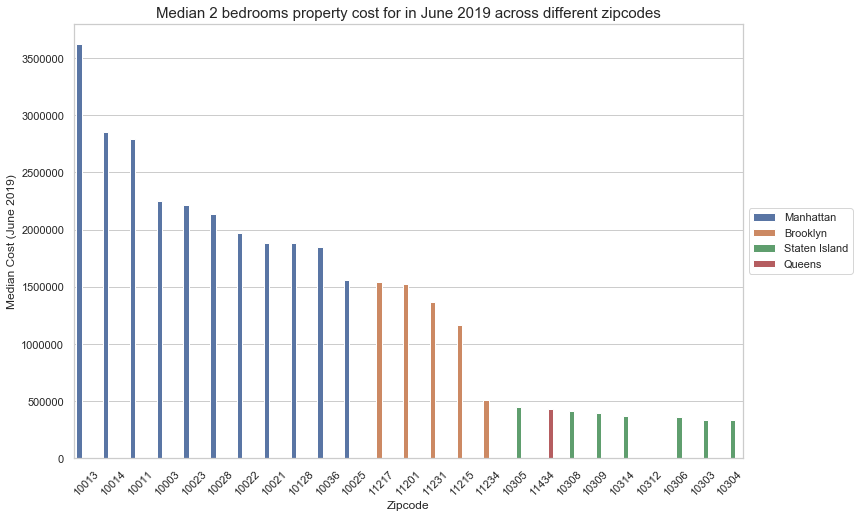

In [64]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'future_cost', order = zillow_final['zipcode'], hue = 'neighbourhood', data = listing_cost_final[listing_cost_final['bedrooms'] == 2], ci=None)
ax.set(xlabel="Zipcode", ylabel='Median Cost (June 2019)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = zillow_final['zipcode'], rotation = 45)
ax.set_title('Median 2 bedrooms property cost for in June 2019 across different zipcodes', fontsize = 15)
plt.show()

- Above plot shows the median property cost across various zipcodes in June 2019. It can be observed properties are cheapest in Staten Island and most expensive in Manhattan.

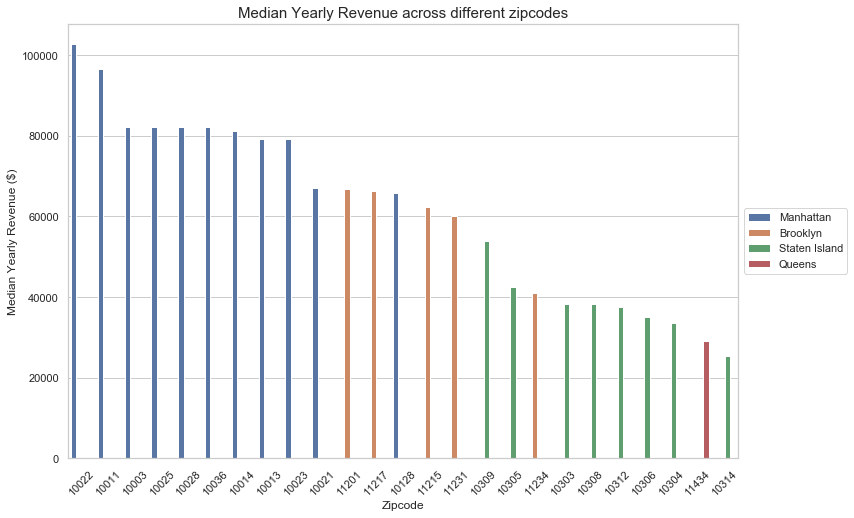

In [65]:
listing_cost_final_revenue = listing_cost_final[['zipcode', 'neighbourhood', 'revenue_yearly']].groupby(['zipcode', 'neighbourhood']).agg({'revenue_yearly':'median'})
listing_cost_final_revenue = listing_cost_final_revenue.sort_values(by = 'revenue_yearly', ascending = False).reset_index()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'revenue_yearly', order = listing_cost_final_revenue['zipcode'], hue = 'neighbourhood', data = listing_cost_final_revenue, ci=None)
ax.set(xlabel="Zipcode", ylabel='Median Yearly Revenue ($)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = listing_cost_final_revenue['zipcode'], rotation = 45)
ax.set_title('Median Yearly Revenue across different zipcodes', fontsize = 15)
plt.show()

- It can be observed from above plot that across all bedrooms size, median revenue will be highest for zipcodes in Manhattan and lowest in Staten Island area.

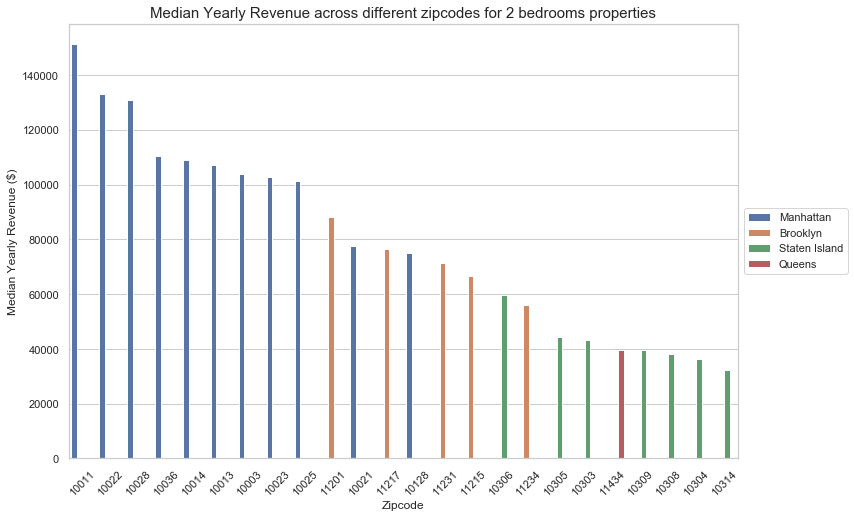

In [66]:
listing_cost_final_revenue_2bed = listing_cost_final[listing_cost_final['bedrooms'] == 2][['zipcode', 'neighbourhood', 'revenue_yearly']].groupby(['zipcode', 'neighbourhood']).agg({'revenue_yearly':'median'})
listing_cost_final_revenue_2bed = listing_cost_final_revenue_2bed.sort_values(by = 'revenue_yearly', ascending = False).reset_index()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x = 'zipcode', y = 'revenue_yearly', order = listing_cost_final_revenue_2bed['zipcode'], hue = 'neighbourhood', data = listing_cost_final_revenue_2bed, ci=None)
ax.set(xlabel="Zipcode", ylabel='Median Yearly Revenue ($)')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_xticklabels(labels = listing_cost_final_revenue_2bed['zipcode'], rotation = 45)
ax.set_title('Median Yearly Revenue across different zipcodes for 2 bedrooms properties', fontsize = 15)
plt.show()

- It can be observed from above plot that for 2 bedrooms size, **median yearly revenue has increased across all zipcodes** and is highest for zipcodes in Manhattan and lowest in Staten Island area.  

In [67]:
#correlation between Population and Median Yearly Revenue 
listing_cost_final_size = listing_cost_final[listing_cost_final['bedrooms'] == 2][['SizeRank', 'neighbourhood', 'revenue_yearly']].groupby(['SizeRank', 'neighbourhood']).agg({'revenue_yearly':'median'})
listing_cost_final_size = listing_cost_final_size.sort_values(by = 'SizeRank').reset_index()
listing_cost_final_size['revenue_yearly'].corr(-listing_cost_final_size['SizeRank'])

0.5044616020619366

Moderate correlation (value of .50) has been observed between SizeRank of zipcode and median yearly revenue. Same has been shown through the graph between Median yearly revenue and population size. (Smaller SizeRank means higher Population)

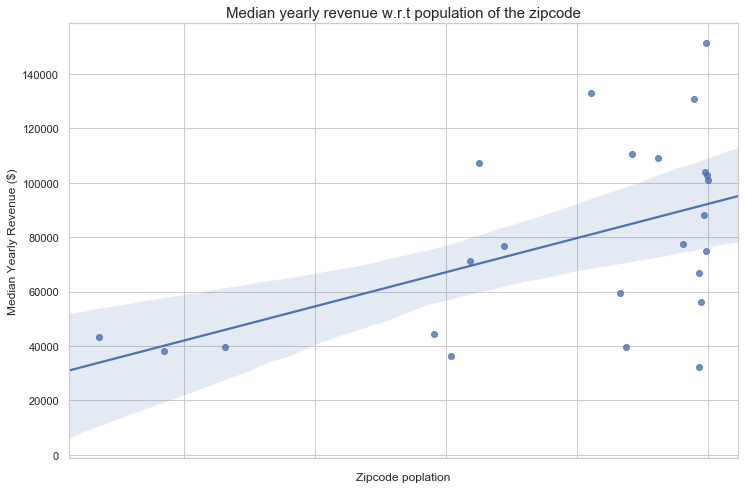

In [68]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.regplot(x = -listing_cost_final_size['SizeRank'] , y = 'revenue_yearly', data = listing_cost_final_size)
ax.set_xticklabels([])
ax.set(xlabel="Zipcode poplation", ylabel='Median Yearly Revenue ($)')
ax.set_title('Median yearly revenue w.r.t population of the zipcode', fontsize=15)
plt.show()

Mean breakeven period across zipcodes in various groups such as bedrooms and property type, is calculated using the breakeven period for all properties.

In [69]:
zipcode_breakeventime = listing_cost_final[listing_cost_final['bedrooms'] == 2].groupby(['zipcode', 'neighbourhood', 'property_type']).agg({'breakeventime': ['mean']})
zipcode_breakeventime = zipcode_breakeventime.droplevel(level = 1, axis=1)
zipcode_breakeventime

breakeventime
zipcode neighbourhood property_type                    
10003   Manhattan     Apartment               38.629108
                      Condominium             28.287072
                      House                   40.302041
                      Loft                    13.338619
                      Other                   21.587502
                      Serviced apartment      18.108721
                      Townhouse                7.812620
10011   Manhattan     Apartment               43.151739
                      Condominium             17.752777
                      Guest suite             15.466434
                      House                   13.683440
                      Loft                    18.475740
                      Serviced apartment      16.914410
                      Townhouse               28.754497
                      Villa                   29.165276
10013   Manhattan     Apartment               54.628490
                      Condominium             24.942719
                      Loft                    39.561604
                      Other                   32.701648
                      Serviced apartment      22.792485
                      Townhouse               34.834364
10014   Manhattan     Apartment               47.667933
                      Condominium             26.137877
                      Loft                    23.175585
                      Serviced apartment      37.923684
                      Townhouse               26.137877
10021   Manhattan     Apartment               30.236185
                      Serviced apartment      14.952757
                      Yurt                    26.659955
10022   Manhattan     Apartment               20.807173
...                                                 ...
11201   Brooklyn      Loft                    17.499196
                      Townhouse                9.397858
11215   Brooklyn      Apartment               17.964901
                      Condominium             27.426922
                      Guest suite             17.124386
                      House                   15.989895
                      Loft                    10.274631
                      Townhouse               22.820848
11217   Brooklyn      Apartment               29.863427
                      Condominium             17.131500
                      Guest suite             20.160104
                      House                   16.435510
                      Loft                    21.710881
                      Townhouse               24.666480
11231   Brooklyn      Apartment               35.331495
                      Condominium             15.312682
                      Guest suite             16.979369
                      House                   17.504186
                      Loft                    14.682160
                      Townhouse               32.349389
11234   Brooklyn      Apartment                9.090587
                      Guest suite             13.804224
                      House                    7.930086
11434   Queens        Apartment                7.443293
                      Boutique hotel          10.084461
                      Bungalow                26.051526
                      Condominium              8.931952
                      Guest suite             11.752568
                      House                   10.779942
                      Townhouse               15.630915

[100 rows x 1 columns]

Since the data majorly consists of Apartments type properties, we are filtering the data for 2 bedrooms set apartments.

In [70]:
zipcode_return_time = zipcode_breakeventime.reset_index()
zipcode_return_time = zipcode_return_time[zipcode_return_time['property_type'] == 'Apartment'].sort_values(by='breakeventime')
zipcode_return_time = zipcode_return_time.merge(listing_cost_final_revenue_2bed, on = 'zipcode')[['zipcode', 'neighbourhood_x', 'breakeventime', 'revenue_yearly']]
zipcode_return_time

,zipcode,neighbourhood_x,breakeventime,revenue_yearly
0,10306,Staten Island,5.283925,59540.62500
1,11434,Queens,7.443293,39693.75000
2,10304,Staten Island,7.638718,36271.87500
3,10303,Staten Island,7.762799,43115.62500
4,11234,Brooklyn,9.090587,56118.75000
5,10305,Staten Island,9.777679,44210.62500
6,10314,Staten Island,14.512330,32302.50000
7,11215,Brooklyn,17.964901,66726.56250
8,11201,Brooklyn,19.408497,88284.37500
9,10028,Manhattan,19.998074,130852.50000


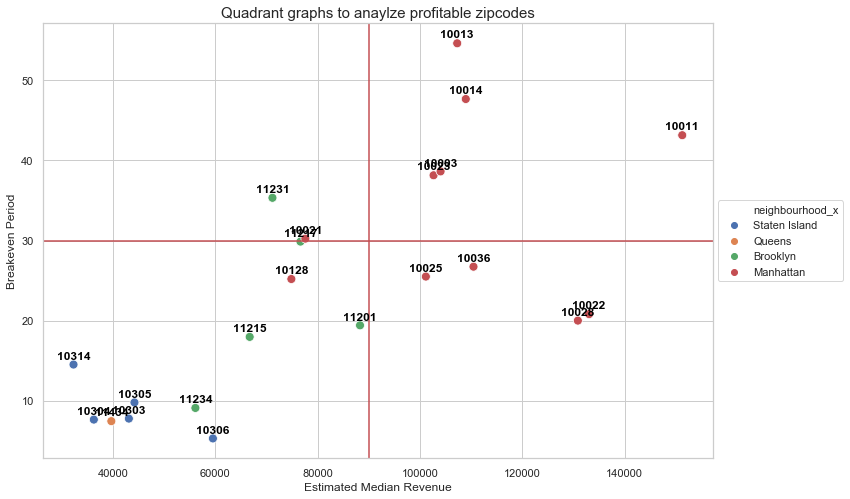

In [71]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.scatterplot(x = 'revenue_yearly', y = 'breakeventime', hue = 'neighbourhood_x', s = 80, data = zipcode_return_time)
for line in range(0,zipcode_return_time.shape[0]):
     ax.text(zipcode_return_time.revenue_yearly[line]+0.7, zipcode_return_time.breakeventime[line]+0.7, zipcode_return_time.zipcode[line], horizontalalignment='center', size='medium', color='black', weight='semibold')
ax.set(xlabel="Estimated Median Revenue", ylabel='Breakeven Period')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_title('Quadrant graphs to anaylze profitable zipcodes', fontsize = 15)
plt.axvline(90000, color='r')
plt.axhline(30, color='r')
plt.show()

Above plot shows distribution of breakeven period and estimated median revenue for each zipcode. Each quadrant shows a particular category mentioned below - 
- Bottom left quadrant - Low Risk and Low Revenue zipcodes
- Top left quadrant - High Risk and Low Revenue zipcodes
- Bottom right quadrant - Low Risk and High Revenue zipcodes
- Top right quadrant - High Risk and High Revenue zipcodes

From the above data and plot, top 5 zipcodes for investment with minimum breakeven periods are below -
1. **10306 zipcode** in Staten Island has breakeven period of **5.2 years**.
2. **10303 zipcode** in Staten Island has breakeven period of **7.4 years**.
3. **11434 zipcode** in Queens has breakeven period of **7.6 years**.
4. **10304 zipcode** in Staten Island has breakeven period of **7.8 years**.
5. **11234 zipcode** in Brooklyn has breakeven period of **9.1 years**.

## Study including review score and amenities score in final calculation

Below study has been done to see the effect of including review score and amenities score in final calculation.

In [72]:
#merging various files to make a common file for cost and scores
listing_cost_final_1 = zillow_final.merge(listings_cost.reset_index(), on = 'zipcode')
listing_cost_final_1 = listing_cost_final_1.merge(listings_amenities, on = 'zipcode')
listing_cost_final_1 = listing_cost_final_1.merge(listings_review, on = 'zipcode')

Instead of assuming the occupancy rate to be 0.75 for all properties, it is being calculated on the basis of review score and amenities score considering the base rate to be 0.75. Below mentioned steps have been followed during the process - 
1. Occupancy rate for each property has been calculated by multiplying the base rate with review score and amenities score.
2. Data for occupancy was then divided into 5 equal quantile and a value of (.72,.74,.76,.78,.80) has been allotted to each point depending on the quantile in which data is belonging.
3. Revenue and breakeven time was then calculated using the calculated occupancy rate, rental price and cleaning fees.  

In [73]:
listing_cost_final_1['occupancy'] = occupancy_rate*listing_cost_final_1['review_score']*listing_cost_final_1['amenities_score']
listing_cost_final_1['occupancy'] = pd.qcut(listing_cost_final_1['occupancy'], q = [0,.2,.4,.6,.8,1], labels=[.72,.74,.76,.78,.80])
listing_cost_final_1['occupancy'] = listing_cost_final_1['occupancy'].astype(float)
listing_cost_final_1.head()

,index,zipcode,City,SizeRank,future_cost,bedrooms,neighbourhood_x,property_type,room_type,price,cleaning_fee,neighbourhood_y,amenities_score,neighbourhood,review_score,occupancy
0,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Entire home/apt,150.0,79.5,Manhattan,0.873081,Manhattan,0.961206,0.74
1,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Private room,85.0,79.5,Manhattan,0.873081,Manhattan,0.961206,0.74
2,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Loft,Entire home/apt,320.0,130.0,Manhattan,0.873081,Manhattan,0.961206,0.74
3,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Serviced apartment,Entire home/apt,135.0,79.5,Manhattan,0.873081,Manhattan,0.961206,0.74
4,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Entire home/apt,175.0,79.5,Manhattan,0.873081,Manhattan,0.961206,0.74


In [74]:
listing_cost_final_1['revenue_yearly'] = (listing_cost_final_1['price'] + listing_cost_final_1['cleaning_fee']) * listing_cost_final_1['occupancy'] * availability
listing_cost_final_1['breakeventime'] = listing_cost_final_1['future_cost']/listing_cost_final_1['revenue_yearly']
listing_cost_final_1

,index,zipcode,City,SizeRank,future_cost,bedrooms,neighbourhood_x,property_type,room_type,price,cleaning_fee,neighbourhood_y,amenities_score,neighbourhood,review_score,occupancy,revenue_yearly,breakeventime
0,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Entire home/apt,150.0,79.50,Manhattan,0.873081,Manhattan,0.961206,0.74,61987.950,58.380327
1,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Apartment,Private room,85.0,79.50,Manhattan,0.873081,Manhattan,0.961206,0.74,44431.450,81.448541
2,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Loft,Entire home/apt,320.0,130.00,Manhattan,0.873081,Manhattan,0.961206,0.74,121545.000,29.773967
3,1743,10013,New York,1744,3.618877e+06,0.0,Manhattan,Serviced apartment,Entire home/apt,135.0,79.50,Manhattan,0.873081,Manhattan,0.961206,0.74,57936.450,62.462867
4,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Entire home/apt,175.0,79.50,Manhattan,0.873081,Manhattan,0.961206,0.74,68740.450,52.645521
5,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Private room,100.0,50.00,Manhattan,0.873081,Manhattan,0.961206,0.74,40515.000,89.321900
6,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Apartment,Shared room,100.0,50.00,Manhattan,0.873081,Manhattan,0.961206,0.74,40515.000,89.321900
7,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Bed and breakfast,Private room,106.0,79.50,Manhattan,0.873081,Manhattan,0.961206,0.74,50103.550,72.227952
8,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Boutique hotel,Private room,100.0,0.00,Manhattan,0.873081,Manhattan,0.961206,0.74,27010.000,133.982851
9,1743,10013,New York,1744,3.618877e+06,1.0,Manhattan,Condominium,Entire home/apt,259.0,100.00,Manhattan,0.873081,Manhattan,0.961206,0.74,96965.900,37.321128


Mean breakeven period across zipcodes in various groups such as bedrooms and property type, is calculated using the breakeven period for all properties.

In [75]:
zipcode_breakeventime_1 = listing_cost_final_1[listing_cost_final_1['bedrooms']==2].groupby(['zipcode', 'neighbourhood', 'property_type']).agg({'breakeventime': ['mean']})
zipcode_breakeventime_1 = zipcode_breakeventime_1.droplevel(level = 1, axis=1)
zipcode_breakeventime_1

breakeventime
zipcode neighbourhood property_type                    
10003   Manhattan     Apartment               40.238654
                      Condominium             29.465700
                      House                   41.981292
                      Loft                    13.894395
                      Other                   22.486981
                      Serviced apartment      18.863251
                      Townhouse                8.138146
10011   Manhattan     Apartment               42.583953
                      Condominium             17.519188
                      Guest suite             15.262929
                      House                   13.503395
                      Loft                    18.232639
                      Serviced apartment      16.691852
                      Townhouse               28.376149
                      Villa                   28.781522
10013   Manhattan     Apartment               55.366713
                      Condominium             25.279783
                      Loft                    40.096220
                      Other                   33.143562
                      Serviced apartment      23.100491
                      Townhouse               35.305099
10014   Manhattan     Apartment               48.312094
                      Condominium             26.491092
                      Loft                    23.488768
                      Serviced apartment      38.436166
                      Townhouse               26.491092
10021   Manhattan     Apartment               30.644782
                      Serviced apartment      15.154822
                      Yurt                    27.020225
10022   Manhattan     Apartment               21.674138
...                                                 ...
11201   Brooklyn      Loft                    16.405496
                      Townhouse                8.810492
11215   Brooklyn      Apartment               16.842095
                      Condominium             25.712739
                      Guest suite             16.054112
                      House                   14.990527
                      Loft                     9.632467
                      Townhouse               21.394545
11217   Brooklyn      Apartment               28.714834
                      Condominium             16.472596
                      Guest suite             19.384715
                      House                   15.803375
                      Loft                    20.875847
                      Townhouse               23.717769
11231   Brooklyn      Apartment               33.972591
                      Condominium             14.723733
                      Guest suite             16.326316
                      House                   16.830948
                      Loft                    14.117462
                      Townhouse               31.105182
11234   Brooklyn      Apartment                8.740949
                      Guest suite             13.273293
                      House                    7.625083
11434   Queens        Apartment                6.978087
                      Boutique hotel           9.454183
                      Bungalow                24.423305
                      Condominium              8.373705
                      Guest suite             11.018032
                      House                   10.106195
                      Townhouse               14.653983

[100 rows x 1 columns]

Since the data majorly consists of Apartments type properties, we are filtering the data for 2 bedrooms set apartments.

In [76]:
zipcode_return_2bed_1 = zipcode_breakeventime_1.reset_index()
zipcode_return_2bed_1 = zipcode_return_2bed_1[zipcode_return_2bed_1['property_type'] == 'Apartment'].sort_values(by='breakeventime')
zipcode_return_2bed_1 = zipcode_return_2bed_1.merge(listing_cost_final_revenue_2bed, on = 'zipcode')[['zipcode', 'neighbourhood_x', 'breakeventime', 'revenue_yearly']]
zipcode_return_2bed_1

,zipcode,neighbourhood_x,breakeventime,revenue_yearly
0,10306,Staten Island,5.080697,59540.62500
1,11434,Queens,6.978087,39693.75000
2,10304,Staten Island,7.538209,36271.87500
3,10303,Staten Island,7.660657,43115.62500
4,11234,Brooklyn,8.740949,56118.75000
5,10305,Staten Island,9.401614,44210.62500
6,10314,Staten Island,14.321378,32302.50000
7,11215,Brooklyn,16.842095,66726.56250
8,11201,Brooklyn,18.195466,88284.37500
9,10028,Manhattan,20.831327,130852.50000


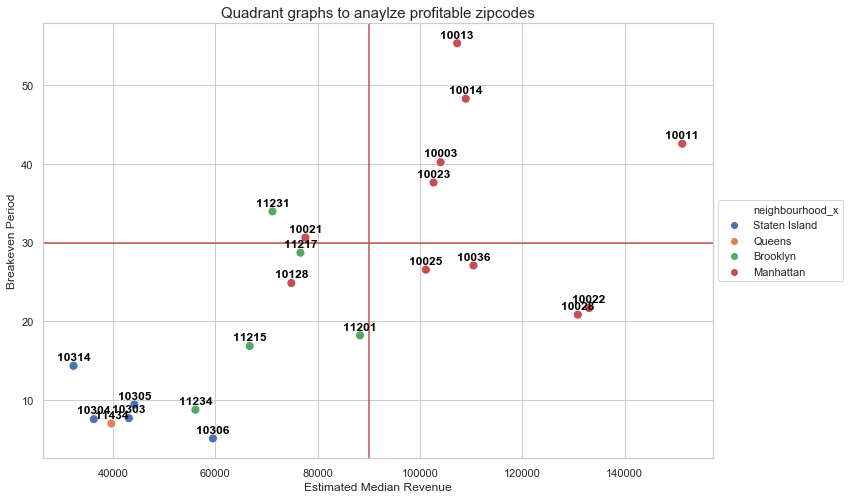

In [78]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.scatterplot(x = 'revenue_yearly', y = 'breakeventime', hue = 'neighbourhood_x', s = 80, data = zipcode_return_2bed_1)
for line in range(0,zipcode_return_2bed_1.shape[0]):
     ax.text(zipcode_return_2bed_1.revenue_yearly[line]+0.7, zipcode_return_2bed_1.breakeventime[line]+0.7, zipcode_return_2bed_1.zipcode[line], horizontalalignment='center', size='medium', color='black', weight='semibold')
ax.set(xlabel="Estimated Median Revenue", ylabel='Breakeven Period')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
ax.set_title('Quadrant graphs to anaylze profitable zipcodes', fontsize = 15)
plt.axvline(90000, color='r')
plt.axhline(30, color='r')
plt.show()

Above plot shows distribution of breakeven period and estimated median revenue for each zipcode. Each quadrant shows a particular category mentioned below -

- Bottom left quadrant - Low Risk and Low Revenue zipcodes
- Top left quadrant - High Risk and Low Revenue zipcodes
- Bottom right quadrant - Low Risk and High Revenue zipcodes
- Top right quadrant - High Risk and High Revenue zipcodes

From the above data and plot, top 5 zipcodes for investment with minimum breakeven periods are below -

1. **10306 zipcode** in Staten Island has breakeven period of **5.1 years**
2. **11434 zipcode** in Queens has breakeven period of **7.0 years**
3. **10304 zipcode** in Staten Island has breakeven period of **7.6 years**
4. **10303 zipcode** in Staten Island has breakeven period of **7.7 years**
5. **11234 zipcode** in Brooklyn has breakeven period of **8.8 years**




## Thanks for providing me with this opportunity.